# CarResale Exploratory Data Analysis

In this project, we try to have a look into the data related to used cars and understand the relationships among various variables and try to figure out the features which have a maximum impact on price. The goal is to create a predictive model which can give an estimation of the price to a customer who wants to buy/sell a used car.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
from pandas.tools.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from collections import OrderedDict

Lets import the dataset and have a look at the first few records.

In [3]:
carSales = pd.read_csv('D:/cognizant/Hackathon/AutoData.csv',sep=",")
carSales.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [4]:
carSales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
Make                 11914 non-null object
Model                11914 non-null object
Year                 11914 non-null int64
Engine Fuel Type     11911 non-null object
Engine HP            11845 non-null float64
Engine Cylinders     11884 non-null float64
Transmission Type    11914 non-null object
Driven_Wheels        11914 non-null object
Number of Doors      11908 non-null float64
Market Category      8172 non-null object
Vehicle Size         11914 non-null object
Vehicle Style        11914 non-null object
highway MPG          11914 non-null int64
city mpg             11914 non-null int64
Popularity           11914 non-null int64
MSRP                 11914 non-null int64
dtypes: float64(3), int64(5), object(8)
memory usage: 1.5+ MB


As we can see above, there are a total of 16 features. The popularity of car is a number obtained from twitter assigned to a particular Make and Model. Since, the users will not be aware of the popularity of a particular make, we should choose to ignore this feature.

In [5]:
#dropping Popularity
carSales=carSales.drop('Popularity',axis=1)

We can also create new features such as the Age of the car, which is certainly a very important characteristic that a buyer looks into while looking for a used car.

In [6]:
#This dataset is from 2017. So, using that as a reference to calculate the age of the car .
carSales['Age']=2017-carSales['Year']

In [7]:
carSales.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,MSRP,Age
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,1.191400e+04,11914.000000
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,4.059474e+04,6.615662
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,6.010910e+04,7.579740
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000e+03,0.000000
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,2.100000e+04,1.000000
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,2.999500e+04,2.000000
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,4.223125e+04,10.000000
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,2.065902e+06,27.000000


We can see above that there are a few columns which have a few blank values as the count is less than the total number of records 11914.

First, let us check the target variable MSRP

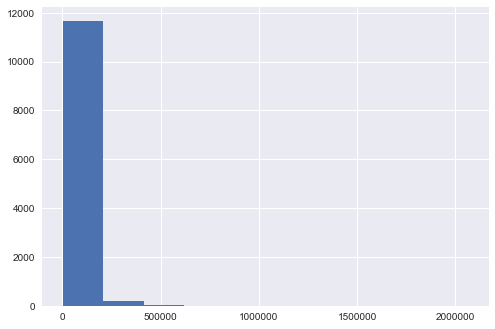

In [9]:
plt.hist(carSales['MSRP'])
plt.show()

Clearly, this is a skewed distribution. There are cars of several makes and models in this dataset. Lets have a look at the price with respect to the Make of the car.  

Populating the interactive namespace from numpy and matplotlib


C:\Program Files\Microsoft SQL Server\MSSQL14.MSSQLSERVER\PYTHON_SERVICES\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


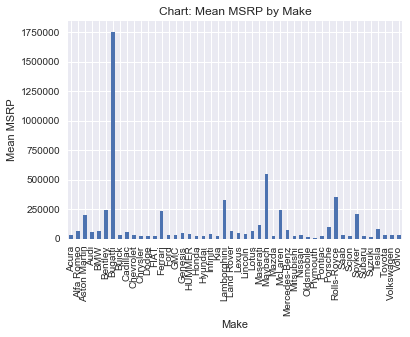

In [10]:
%pylab inline
Make=carSales.groupby(['Make'])['MSRP'].mean()
Make.plot(kind='bar',stacked=True)
pylab.ylabel('Mean MSRP')
pylab.title('Chart: Mean MSRP by Make')
show()

From the above plot, we see that the Make of a car has a significant impact on price. This is obvious as different manufacturers produce cars in different price ranges. It might be difficult for a single model to fit well to all the data. So, it might be wise to divide the data w.r.t price and then we can have individual models for a single price range.

In [11]:
carSales=carSales.join(carSales.groupby('Make')['MSRP'].mean(), on='Make', rsuffix='_Mean')

In [12]:
make = carSales.groupby('Make')['MSRP'].mean().reset_index()
pd.options.display.float_format = '{:.4f}'.format
make.sort_values('MSRP', ascending=False)

,Make,MSRP
6,Bugatti,1757223.6667
28,Maybach,546221.8750
38,Rolls-Royce,351130.6452
22,Lamborghini,331567.3077
5,Bentley,247169.3243
30,McLaren,239805.0000
13,Ferrari,238218.8406
41,Spyker,213323.3333
2,Aston Martin,197910.3763
27,Maserati,114207.7069


In [13]:
def map_MSRP_to_group(x):
    if x<30000:
        return 'ordinary'
    elif x<60000 :
        return 'deluxe'
    elif x<90000:
        return 'super-deluxe'
    elif x<350000:
        return 'luxury'
    else:
        return 'super-luxury'

#function to convert a series    
def convert_MSRP_series_to_MSRP_group(MSRP):
    return MSRP.apply(map_MSRP_to_group)

MSRP_group=convert_MSRP_series_to_MSRP_group(carSales['MSRP_Mean'])
carSales['MSRP_group'] = MSRP_group
carSales.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,MSRP,Age,MSRP_Mean,MSRP_group
0,BMW,1 Series M,2011,premium unleaded (required),335.0000,6.0000,MANUAL,rear wheel drive,2.0000,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,46135,6,61546.7635,super-deluxe
1,BMW,1 Series,2011,premium unleaded (required),300.0000,6.0000,MANUAL,rear wheel drive,2.0000,"Luxury,Performance",Compact,Convertible,28,19,40650,6,61546.7635,super-deluxe
2,BMW,1 Series,2011,premium unleaded (required),300.0000,6.0000,MANUAL,rear wheel drive,2.0000,"Luxury,High-Performance",Compact,Coupe,28,20,36350,6,61546.7635,super-deluxe
3,BMW,1 Series,2011,premium unleaded (required),230.0000,6.0000,MANUAL,rear wheel drive,2.0000,"Luxury,Performance",Compact,Coupe,28,18,29450,6,61546.7635,super-deluxe
4,BMW,1 Series,2011,premium unleaded (required),230.0000,6.0000,MANUAL,rear wheel drive,2.0000,Luxury,Compact,Convertible,28,18,34500,6,61546.7635,super-deluxe


Lets have a look at the Makes present in various price groups

In [14]:
carSales[carSales['MSRP_group']=='ordinary']['Make'].unique()

array(['FIAT', 'Chrysler', 'Nissan', 'Volvo', 'Mazda', 'Mitsubishi',
       'Toyota', 'Pontiac', 'Saab', 'Hyundai', 'Plymouth', 'Honda',
       'Oldsmobile', 'Suzuki', 'Ford', 'Kia', 'Chevrolet', 'Dodge',
       'Subaru', 'Volkswagen', 'Buick', 'Scion'], dtype=object)

In [15]:
carSales[carSales['MSRP_group']=='deluxe']['Make'].unique()

array(['Audi', 'GMC', 'Cadillac', 'Lincoln', 'Acura', 'Lexus', 'Infiniti',
       'Genesis', 'HUMMER'], dtype=object)

In [17]:
carSales[carSales['MSRP_group']=='super-deluxe']['Make'].unique()

array(['BMW', 'Mercedes-Benz', 'Alfa Romeo', 'Land Rover', 'Lotus',
       'Tesla'], dtype=object)

In [18]:
carSales[carSales['MSRP_group']=='luxury']['Make'].unique()

array(['Ferrari', 'McLaren', 'Porsche', 'Bentley', 'Lamborghini',
       'Spyker', 'Maserati', 'Aston Martin'], dtype=object)

In [19]:
carSales[carSales['MSRP_group']=='super-luxury']['Make'].unique()

array(['Maybach', 'Rolls-Royce', 'Bugatti'], dtype=object)

Lets save the data as pickle files and they can be used easily for further processing

In [20]:
#Creating Pickle files
import pickle
ordinary='ord.pkl'
deluxe='del.pkl'
supdel='supdel.pkl'
luxury='luxury.pkl'
suplux='suplux.pkl'

with open(ordinary, "wb") as f:
    w = pickle.dump(carSales[carSales['MSRP_group']=='ordinary'],f)
with open(deluxe, "wb") as f:
    w = pickle.dump(carSales[carSales['MSRP_group']=='deluxe'],f)
with open(supdel, "wb") as f:
    w = pickle.dump(carSales[carSales['MSRP_group']=='super-deluxe'],f)
with open(luxury, "wb") as f:
    w = pickle.dump(carSales[carSales['MSRP_group']=='luxury'],f)
with open(suplux, "wb") as f:
    w = pickle.dump(carSales[carSales['MSRP_group']=='super-luxury'],f)

Here, we shall provide the analysis for just one of the files. The remaining files will be processed in the same manner. Lets have a look at the super-deluxe category

In [67]:
supdel=pd.read_pickle('supdel.pkl')
supdel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 882 entries, 0 to 11905
Data columns (total 18 columns):
Make                 882 non-null object
Model                882 non-null object
Year                 882 non-null int64
Engine Fuel Type     882 non-null object
Engine HP            863 non-null float64
Engine Cylinders     882 non-null float64
Transmission Type    882 non-null object
Driven_Wheels        882 non-null object
Number of Doors      877 non-null float64
Market Category      882 non-null object
Vehicle Size         882 non-null object
Vehicle Style        882 non-null object
highway MPG          882 non-null int64
city mpg             882 non-null int64
MSRP                 882 non-null int64
Age                  882 non-null int64
MSRP_Mean            882 non-null float64
MSRP_group           882 non-null object
dtypes: float64(4), int64(5), object(9)
memory usage: 130.9+ KB


The index is still set to that of the original dataframe. Lets reset that. 

In [68]:
supdel = supdel.reset_index(drop=True)

We know that there are a few assumtions for Linear Regression: 
- No or little multicollinearity
- Linear relationship
- Multivariate normality
- No auto-correlation
- Homoscedasticity
<br>Let us check if the above assumptions hold true for our data. First we will try to check for multicollinearity i.e whether there is any correlation between the independent variables. We will try to create a heatmap for correlation among the various variables.


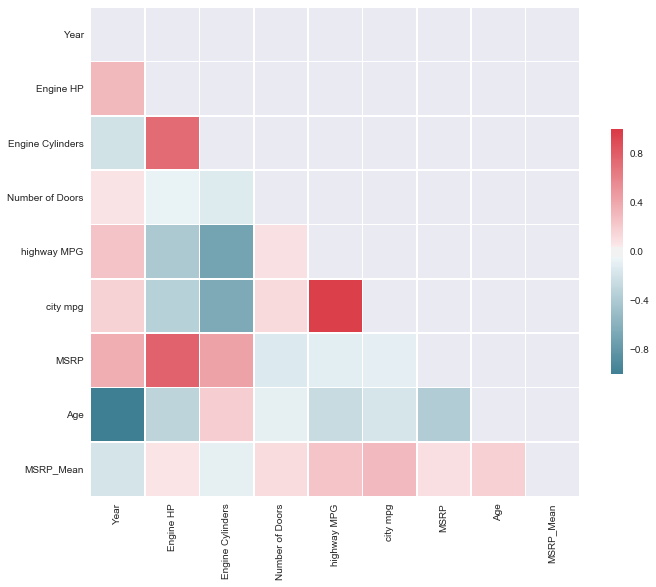

In [69]:
corr=supdel.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [59]:
#Also showcasing the table below to lookup exact values for reference.
corr

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,MSRP,Age,MSRP_Mean
Year,1.0000,0.3101,-0.1983,0.0792,0.2523,0.1741,0.3730,-1.0000,-0.1807
Engine HP,0.3101,1.0000,0.7336,-0.0657,-0.4038,-0.3402,0.7803,-0.3101,0.0754
Engine Cylinders,-0.1983,0.7336,1.0000,-0.1308,-0.7058,-0.6531,0.4329,0.1983,-0.0816
Number of Doors,0.0792,-0.0657,-0.1308,1.0000,0.0900,0.1260,-0.1347,-0.0792,0.1225
highway MPG,0.2523,-0.4038,-0.7058,0.0900,1.0000,0.9733,-0.1027,-0.2523,0.2481
city mpg,0.1741,-0.3402,-0.6531,0.1260,0.9733,1.0000,-0.0886,-0.1741,0.2984
MSRP,0.3730,0.7803,0.4329,-0.1347,-0.1027,-0.0886,1.0000,-0.3730,0.1036
Age,-1.0000,-0.3101,0.1983,-0.0792,-0.2523,-0.1741,-0.3730,1.0000,0.1807
MSRP_Mean,-0.1807,0.0754,-0.0816,0.1225,0.2481,0.2984,0.1036,0.1807,1.0000


As we can see above, there is a very strong negative correlation between Year and Age, which makes sense as the Age of the car is a derived feature created using Year. Highway MPG and City MPG have a strong positive correlation with each other. The same is true for Engine HP and Engine Cylinders. Here selection of the features becomes a bit tricky as we need to keep in mind the popular features. We select Engine HP as it is strongly correlated with price and that is our ultimate objective. City MPG and Highway MPG are almost equally correlated to MRSP. Hence, we select City MPG. But further research can go into this by creating surveys,etc.

Also, dropping MSRP Mean and MSRP group as they are of no use.

In [70]:
#dropping the features as discussed above
supdel=supdel.drop(['Year','Engine Cylinders','highway MPG','MSRP_group','MSRP_Mean'],axis=1)
supdel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 882 entries, 0 to 881
Data columns (total 13 columns):
Make                 882 non-null object
Model                882 non-null object
Engine Fuel Type     882 non-null object
Engine HP            863 non-null float64
Transmission Type    882 non-null object
Driven_Wheels        882 non-null object
Number of Doors      877 non-null float64
Market Category      882 non-null object
Vehicle Size         882 non-null object
Vehicle Style        882 non-null object
city mpg             882 non-null int64
MSRP                 882 non-null int64
Age                  882 non-null int64
dtypes: float64(2), int64(3), object(8)
memory usage: 89.7+ KB


# Data Cleansing
Next, we try to fix the blank values. As, we can see above there are blank values for  Engine HP and Number of Doors. Now lets check the Number of doors first.

In [71]:
supdel[supdel['Number of Doors'].isnull()]

,Make,Model,Engine Fuel Type,Engine HP,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,city mpg,MSRP,Age
643,Tesla,Model S,electric,nan,DIRECT_DRIVE,all wheel drive,nan,"Exotic,Performance",Large,Sedan,102,79500,1
644,Tesla,Model S,electric,nan,DIRECT_DRIVE,all wheel drive,nan,"Exotic,Performance",Large,Sedan,98,66000,1
645,Tesla,Model S,electric,nan,DIRECT_DRIVE,all wheel drive,nan,"Exotic,High-Performance",Large,Sedan,92,134500,1
646,Tesla,Model S,electric,nan,DIRECT_DRIVE,rear wheel drive,nan,"Exotic,Performance",Large,Sedan,97,74500,1
647,Tesla,Model S,electric,nan,DIRECT_DRIVE,all wheel drive,nan,"Exotic,Performance",Large,Sedan,101,71000,1


We lookup the number of doors for Tesla Model S. It has 4 doors

In [72]:
supdel.ix[supdel['Number of Doors'].isnull(),'Number of Doors']=4

Now, lets look at Engine HP

In [73]:
supdel[supdel['Engine HP'].isnull()]

,Make,Model,Engine Fuel Type,Engine HP,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,city mpg,MSRP,Age
597,Mercedes-Benz,M-Class,diesel,nan,AUTOMATIC,all wheel drive,4.0000,"Crossover,Luxury,Diesel",Midsize,4dr SUV,22,49800,2
634,Tesla,Model S,electric,nan,DIRECT_DRIVE,rear wheel drive,4.0000,"Exotic,High-Performance",Large,Sedan,88,79900,3
635,Tesla,Model S,electric,nan,DIRECT_DRIVE,rear wheel drive,4.0000,"Exotic,Performance",Large,Sedan,94,69900,3
636,Tesla,Model S,electric,nan,DIRECT_DRIVE,all wheel drive,4.0000,"Exotic,High-Performance",Large,Sedan,86,104500,3
637,Tesla,Model S,electric,nan,DIRECT_DRIVE,rear wheel drive,4.0000,"Exotic,High-Performance",Large,Sedan,88,93400,3
638,Tesla,Model S,electric,nan,DIRECT_DRIVE,rear wheel drive,4.0000,"Exotic,Performance",Large,Sedan,94,69900,2
639,Tesla,Model S,electric,nan,DIRECT_DRIVE,all wheel drive,4.0000,"Exotic,Performance",Large,Sedan,101,75000,2
640,Tesla,Model S,electric,nan,DIRECT_DRIVE,all wheel drive,4.0000,"Exotic,High-Performance",Large,Sedan,95,85000,2
641,Tesla,Model S,electric,nan,DIRECT_DRIVE,all wheel drive,4.0000,"Exotic,High-Performance",Large,Sedan,89,105000,2
642,Tesla,Model S,electric,nan,DIRECT_DRIVE,rear wheel drive,4.0000,"Exotic,Performance",Large,Sedan,88,80000,2


It seems Engine HP is missing for Tesla Model S and Mercedes Benz M-class. 
Lets lookup the values from the internet and substitute them.

In [74]:
#For Tesla Model S HP is 752
supdel.ix[(supdel[supdel['Engine HP'].isnull()]['Engine HP'].isnull())&(supdel['Make']=='Tesla'),'Engine HP']=762
#For Mercedes Benx M-class HP is 329
supdel.ix[(supdel[supdel['Engine HP'].isnull()]['Engine HP'].isnull())&(supdel['Make']=='Mercedes-Benz'),'Engine HP']=329

Market Category contains some generic categorical value for the car. The buyer/seller will not be aware of such values in our dataset. Hence, it should not be considered while creating the regression model

In [75]:
supdel=supdel.drop('Market Category',axis=1)

# Normality and Outliers
Now, lets check for normality. We can check this by creating histogram of the features. 

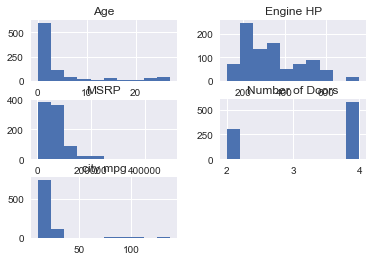

In [77]:
supdel.hist()
plt.show()

Lets have a look at our target variable MSRP

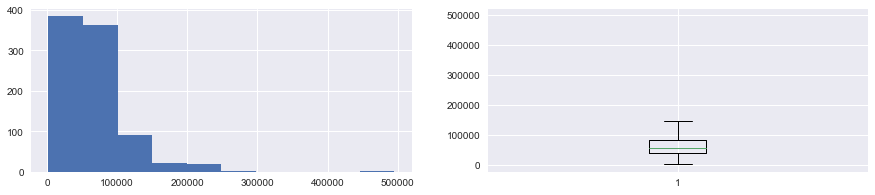

In [89]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,3))
ax1.hist(supdel['MSRP'])
ax2.boxplot(supdel['MSRP'])
plt.show()

As we can see above, the price is a positively skewed distribution. We know that one of the assumptions for using LinearRegression is that the variables be normally distributed.

Also,there seem to be some outliers. Lets have a look at them

In [87]:
supdel[supdel['MSRP']>400000]

,Make,Model,Engine Fuel Type,Engine HP,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,city mpg,MSRP,Age,log_MSRP
792,Mercedes-Benz,SLR McLaren,premium unleaded (required),641.0000,AUTOMATIC,rear wheel drive,2.0000,Compact,Coupe,11,480000,10,480000
793,Mercedes-Benz,SLR McLaren,premium unleaded (required),617.0000,AUTOMATIC,rear wheel drive,2.0000,Compact,Convertible,12,495000,9,495000
794,Mercedes-Benz,SLR McLaren,premium unleaded (required),617.0000,AUTOMATIC,rear wheel drive,2.0000,Compact,Convertible,12,495000,8,495000


When we assigned a grouping based on price, we did so on the basis of Mean price per Make.This will work in most of the cases but there may be individual models that can be in a different category. One such example is the SLR McLaren. We will remove the above records from this 'super-deluxe' category and introduce the same in 'super-luxury' category

In [90]:
supdel=supdel[supdel['MSRP']<400000]

In [92]:
supdel[supdel['MSRP']<10000]

,Make,Model,Engine Fuel Type,Engine HP,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,city mpg,MSRP,Age,log_MSRP
17,Mercedes-Benz,190-Class,regular unleaded,130.0000,MANUAL,rear wheel drive,4.0000,Compact,Sedan,18,2000,26,7.6014
18,Mercedes-Benz,190-Class,regular unleaded,158.0000,MANUAL,rear wheel drive,4.0000,Compact,Sedan,17,2000,26,7.6014
19,Mercedes-Benz,190-Class,regular unleaded,158.0000,MANUAL,rear wheel drive,4.0000,Compact,Sedan,17,2000,25,7.6014
20,Mercedes-Benz,190-Class,regular unleaded,130.0000,MANUAL,rear wheel drive,4.0000,Compact,Sedan,18,2000,25,7.6014
21,Mercedes-Benz,190-Class,regular unleaded,130.0000,MANUAL,rear wheel drive,4.0000,Compact,Sedan,18,2000,24,7.6014
22,Mercedes-Benz,190-Class,regular unleaded,158.0000,MANUAL,rear wheel drive,4.0000,Compact,Sedan,17,2000,24,7.6014
81,Mercedes-Benz,300-Class,regular unleaded,177.0000,AUTOMATIC,rear wheel drive,4.0000,Large,Sedan,15,2232,26,7.7111
82,Mercedes-Benz,300-Class,regular unleaded,177.0000,AUTOMATIC,rear wheel drive,4.0000,Midsize,Wagon,15,2000,26,7.6014
83,Mercedes-Benz,300-Class,regular unleaded,158.0000,AUTOMATIC,rear wheel drive,4.0000,Midsize,Sedan,17,2000,26,7.6014
84,Mercedes-Benz,300-Class,regular unleaded,177.0000,AUTOMATIC,all wheel drive,4.0000,Midsize,Sedan,15,2105,26,7.6525


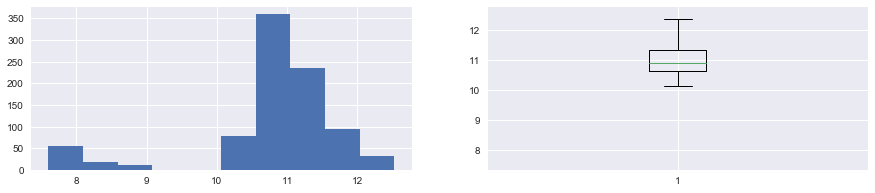

In [91]:
supdel['log_MSRP']=supdel['MSRP'].apply(lambda x:np.log(x+1))
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,3))
ax1.hist(supdel['log_MSRP'])
ax2.boxplot(supdel['log_MSRP'])
plt.show()